In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.shape

(891, 12)

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


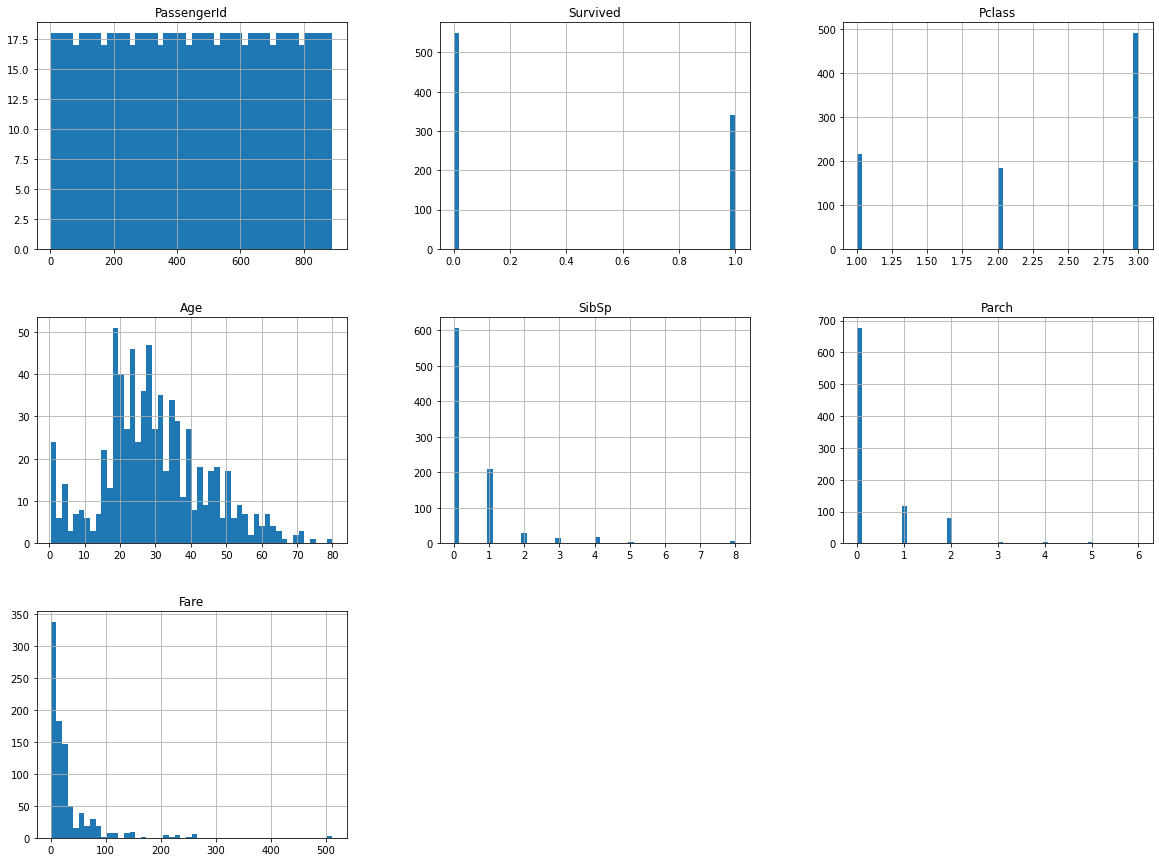

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

## Data Cleaning

we want to fill the missing data instead of just droping the missing age data rows . one way to do thisby filling in the mean age of all pasanger(impulation) .however we can check the average age by passenger class for example

<AxesSubplot:>

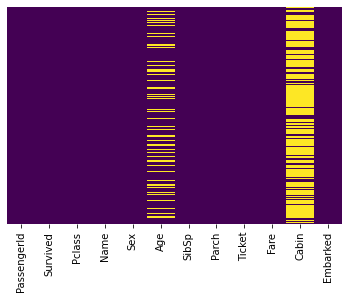

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

In [8]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [9]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

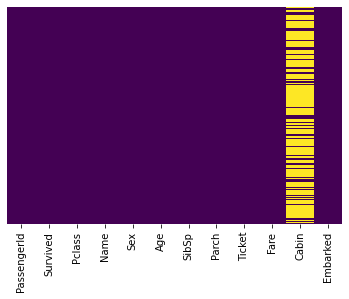

In [10]:
sns.heatmap(train.isnull(),yticklabels = False,cbar=False,cmap='viridis')

lets go ahead and drop the cabin column and the row in Embarked is Na

In [11]:
train.dropna(inplace=True)

## Converting Categorical Features

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     202 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 20.5+ KB


In [13]:
pd.get_dummies(train["Embarked"],drop_first=True).head()
# c Q S 
# 1 0 0
# 0 1 0

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [14]:
sex = pd.get_dummies(train['Sex'],drop_first = True)
embark = pd.get_dummies(train['Embarked'],drop_first = True)

# male female
# 1     0

In [15]:
# dropiing the category value and merging newly defined variable
train.drop(['Sex','Embarked','Name',"Ticket",'Cabin'],axis=1,inplace=True)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500


In [17]:
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,38.0,1,0,71.2833,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1
6,7,0,1,54.0,0,0,51.8625,1,0,1
10,11,1,3,4.0,1,1,16.7000,0,0,1
11,12,1,1,58.0,0,0,26.5500,0,0,1


## Building a Logistic Regression model

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train , X_test, y_train, y_test = train_test_split(
    train.drop('Survived',axis=1), train['Survived'],test_size =0.2,
                                                    random_state=42)

In [20]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
879,880,1,56.0,0,1,83.1583,0,0,0
195,196,1,58.0,0,0,146.5208,0,0,0
128,129,3,24.0,1,1,22.3583,0,0,0
540,541,1,36.0,0,2,71.0000,0,0,1
871,872,1,47.0,1,1,52.5542,0,0,1
...,...,...,...,...,...,...,...,...,...
484,485,1,25.0,1,0,91.0792,1,0,0
75,76,3,25.0,0,0,7.6500,1,0,1
430,431,1,28.0,0,0,26.5500,1,0,1
779,780,1,43.0,0,1,211.3375,0,0,1


In [21]:
y_train

879    1
195    1
128    1
540    1
871    1
      ..
484    1
75     0
430    1
779    1
460    1
Name: Survived, Length: 161, dtype: int64

## LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [24]:
predictions = logistic_model.predict(X_test)
predictions

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(y_test,predictions)
accuracy

array([[ 6,  2],
       [ 3, 30]], dtype=int64)

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
print(cross_val_score(logistic_model,X_train,y_train,cv=5))
accuracy = accuracy_score(y_test,predictions)*100
accuracy

[0.75757576 0.75       0.75       0.65625    0.6875    ]


87.8048780487805

In [27]:
from sklearn.metrics import classification_report
accuracy = accuracy_score(y_test,predictions)*100
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.91      0.94      0.92        32

    accuracy                           0.88        41
   macro avg       0.83      0.80      0.81        41
weighted avg       0.87      0.88      0.88        41



## DecisionTree

In [28]:
from sklearn.tree import DecisionTreeClassifier 
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [29]:
y_pred= classifier.predict(X_test)  
accuracyy = accuracy_score(y_test,y_pred)*100
accuracyy

70.73170731707317

In [30]:
print(cross_val_score(classifier,X_train,y_train,cv=5))

[0.6969697 0.65625   0.78125   0.65625   0.65625  ]


In [31]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.39      0.54        18
           1       0.67      0.96      0.79        23

    accuracy                           0.71        41
   macro avg       0.77      0.67      0.66        41
weighted avg       0.76      0.71      0.68        41



## KNN Algorithm

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [33]:
pred =knn.predict(X_test)
accuracyKNN =accuracy_score(pred,y_test)*100
print("The accuracy OF KNN Model :",accuracyKNN)
print(cross_val_score(knn,X_train,y_train,cv=5))

The accuracy OF KNN Model : 70.73170731707317
[0.66666667 0.59375    0.75       0.59375    0.625     ]


In [34]:
print(classification_report(pred,y_test))


              precision    recall  f1-score   support

           0       0.38      0.30      0.33        10
           1       0.79      0.84      0.81        31

    accuracy                           0.71        41
   macro avg       0.58      0.57      0.57        41
weighted avg       0.69      0.71      0.70        41



## Support vector algorithm

In [35]:
from sklearn.svm import SVC
classifiers = SVC(kernel='linear', random_state=0)  
classifiers.fit(X_train, y_train)
y_predicted = classifiers.predict(X_test)  


In [36]:
accuracySVC = accuracy_score(y_predicted,y_test)*100
print("The accuracy OF Support vector :",accuracySVC)
# print(cross_val_score(classifiers,X_train,y_train,cv=5))

The accuracy OF Support vector : 78.04878048780488


In [37]:
print(cross_val_score(classifiers,X_train,y_train,cv=5))

[0.72727273 0.71875    0.78125    0.71875    0.71875   ]


In [38]:
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        17
           1       0.73      1.00      0.84        24

    accuracy                           0.78        41
   macro avg       0.86      0.74      0.74        41
weighted avg       0.84      0.78      0.76        41



In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters = [{
'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
'C': [1,2,3,300,500],
'max_iter': [1000,100000]}]
clf = GridSearchCV(
        SVC(), parameters, scoring='accuracy'
    )
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 500, 'kernel': 'rbf', 'max_iter': 100000}


In [40]:
from prettytable import PrettyTable
Table = PrettyTable(["Algorithm", "Accuracy"])
Table.add_row(["LogisticRegression", accuracy])
Table.add_row(["Decision Tree", accuracyy])
Table.add_row(["KNN", accuracyKNN])
Table.add_row(["SVC", accuracySVC])
print(Table)

+--------------------+-------------------+
|     Algorithm      |      Accuracy     |
+--------------------+-------------------+
| LogisticRegression |  87.8048780487805 |
|   Decision Tree    | 70.73170731707317 |
|        KNN         | 70.73170731707317 |
|        SVC         | 78.04878048780488 |
+--------------------+-------------------+
